#  **Heart Disease Pridiction**

## Introduction
I am going to use the Cleveland Heart Disease dataset to analysis, clean, and visualize the data. First of all I will look at the data to understand the data and fix any issues like missing values. Then, I will use charts and graphs to show important insights. After that, I will test different machine learning models to predict heart disease, such as logistic regression, decision trees. Lastly, I will compare their accuracy to find out which model works best for predicting heart disease.

## About Dataset
## Context
This dataset is multivariate, meaning it includes various different mathematical or statistical variables. It has 14 main attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, old peak (ST depression caused by exercise), the slope of the peak exercise ST segment, number of major vessels, and Thalassemia. While the database contains 76 attributes, most studies use just these 14. Researchers mainly use the Cleveland database for machine learning. The key task is to predict if a person has heart disease based on these attributes. Another important goal is to analyze the dataset to gain insights that could help understand heart disease better.
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
# import Libraries 

# to handle The data
import pandas as pd
import numpy as np

# to visualise the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for  Preprocessing the Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# Import iterative Imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine_Learning 
# splitting the data into Training and Testing sets
from sklearn.model_selection import train_test_split  ,cross_val_score , GridSearchCV

# Import the necessary libraries for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Matrics For Classification tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error,r2_score , mean_absolute_error

# Ignore warning 
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
df =  pd.read_csv('C:/Users/ahmad\Desktop/global  IT/final Project/dataset/heart_disease_uci.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Column Descriptions:
* `id` (unique id for each patient)
* `age `(age of the patient in years)
* `dataset` (place of study)
* `sex` (male/female)
* `cp chest pain type` 
    1. Typical angina   
    2. Atypical angina 
    3. Non-anginal 
    4. Asymptomatic 
* `trestbps resting blood pressure` (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg `(resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

In [4]:
df.rename(columns={'dataset': 'origin'}, inplace=True)

In [5]:
df.head()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# Data Shape 
df.shape

(920, 16)

In [7]:
# Age Column Check minimum and maxinum value
df['age'].min(), df['age'].max()

# Print The Results Using F string 
print(f'The Minimum age is : {df["age"].min()} \nThe Maximum age is : {df["age"].max()}')

The Minimum age is : 28 
The Maximum age is : 77


#### **Output:**
1. The `Minimum` age to have a heart disease starts from `28` years old.
2. The `Maximum` age to have a heart disease `77` years old.

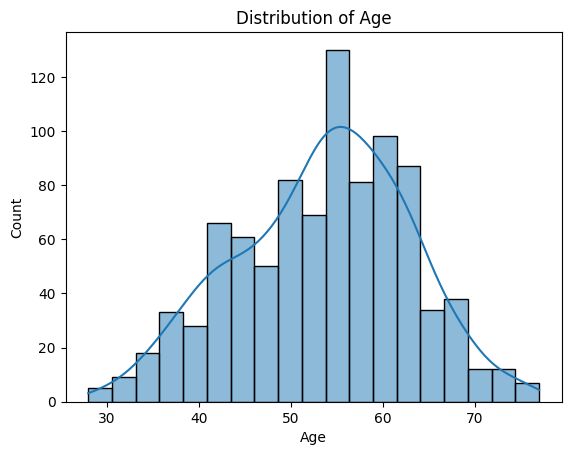

In [8]:
# Plot a histogram to see the distribution of age 
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

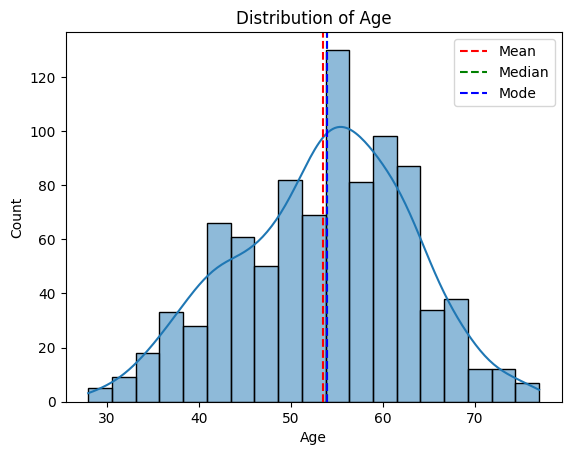

Mean Age : 53.51086956521739 
Median Age : 54.0 
Mode Age : 54


In [9]:
# Plot the mean, median, and mode of age column using sns and coloring

# calculate the mean, median, and mode of the age column
meanAge = df['age'].mean()
medianAge = df['age'].median()
modeAge = df['age'].mode()[0]

# Plot the histogram with mean, median, and mode
sns.histplot(df['age'], kde=True)
plt.axvline(meanAge, color='red', linestyle='--', label='Mean')
plt.axvline(medianAge, color='green', linestyle='--', label='Median')
plt.axvline(modeAge, color='blue', linestyle='--', label='Mode')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Print the Mean ,Median And Mode 
print(f'Mean Age : {meanAge} \nMedian Age : {medianAge} \nMode Age : {modeAge}')



1. **Mean Age (53.51)**: The average age of the individuals in the dataset.
2. **Median Age (54.0)**: The middle age when all ages are sorted in order.
3. **Mode Age (54)**: The most frequently occurring age in the dataset.

In [10]:

# Plot the Histogram using plotly and coloring this by sex
fig = px.histogram(df, x='age', color='sex', nbins=30)
fig.update_layout(title='Distribution of Age by Gender', xaxis_title='Age', yaxis_title='Count', legend_title='Gender')
fig.show()

In [11]:
# count the values Male and Female Individual
maleCount = df[df['sex'] == 'Male'].shape[0]
femaleCount = df[df['sex'] == 'Female'].shape[0]

# Calculate PErcenatge 
male_percentage = (maleCount / (maleCount + femaleCount)) * 100
female_percentage = (femaleCount / (maleCount + femaleCount)) * 100


print(f'The Male percentage  in the data : {male_percentage:.2f} % \nFemale Percentage  in the data: {female_percentage:.2f} %')

# calculate Difference between male and female percentage
diff_percentage = ((maleCount - femaleCount) / femaleCount) * 100

# Print the Result using f string
print(f"Male are {diff_percentage:.2f}% more than Females in the data." )

The Male percentage  in the data : 78.91 % 
Female Percentage  in the data: 21.09 %
Male are 274.23% more than Females in the data.


In [12]:
# find how many man and female in  data 
df['sex'].value_counts()

# Print the value counts
print(df['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


In [13]:
# Find the value count of age column by sex column
age_count_by_sex = df.groupby('sex')['age'].value_counts()
print(age_count_by_sex)

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64



For females:
- 15 females are aged 54.
- 11 females are aged 51.
- 10 females are aged 62.
- 9 females are aged 43.
- 9 females are aged 48.
- (and so on for other ages)

For males:
- 2 males are aged 77.
- 1 male is aged 28.
- 1 male is aged 31.
- 1 male is aged 33.
- 1 male is aged 76.
- (and so on for other ages)

In [14]:
# Lets deal with Dataset column
# find the unique Value of the dataset
datset_unique_value = df['origin'].unique()
# Display the Result in f string
print(f'Unique Values of origin : {datset_unique_value}')
print('-------------------------------------------------')

# Calculate the value count of the dataset
dataset_value_count = df['origin'].value_counts()
print(dataset_value_count)

Unique Values of origin : ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
-------------------------------------------------
origin
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


In [15]:
# countplot  using plotly

fig = px.bar(df, x='origin' ,color='sex')
fig.update_layout(title='origin by Gender', xaxis_title='origin', yaxis_title='Count', legend_title='Gender')
fig.show()

# Print the value count of dataset column grouped by sex 

print(df.groupby('origin')['sex'].value_counts())
print('-------------------------------------------------')

origin         sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64
-------------------------------------------------


In [16]:
# Plot of age column using plotly and coloring by dataset coloum
fig = px.histogram(df, x='age',  color='origin')
fig.update_layout(title='Distribution of Age by origin', xaxis_title='Age', yaxis_title='Count', legend_title='origin')
fig.show()

# Print the mean , median and mode groupby origin column based on age column 
print(f"Mean Age Of origin: \n{df.groupby('origin')['age'].mean()} ")
print('--------------------------------------------------------------------')
print(f"\nMedian Age of origin: \n{df.groupby('origin')['age'].median()} ")
print('--------------------------------------------------------------------')
print (f"\nMode Age of origin: \n{df.groupby('origin')['age'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)}")

Mean Age Of origin: 
origin
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64 
--------------------------------------------------------------------

Median Age of origin: 
origin
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64 
--------------------------------------------------------------------

Mode Age of origin: 
origin
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


#### Explore The CP (Chest Pain) Column:

In [17]:
# Value count of cp coulumn 
cpValueCount = df['cp'].value_counts()
print(cpValueCount)
print('----------------------------------------------------')

# Countplot of cp column using plotly

fig = px.histogram(df, x='age', color='cp')
fig.update_layout(title='Distribution of age by Chest Pain Type', xaxis_title='age', yaxis_title='Count', legend_title='Chest Pain Type')
fig.show()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
----------------------------------------------------


<Axes: title={'center': 'Countplot of Chest Pain Type by origin'}, xlabel='Chest Pain Type', ylabel='Count'>

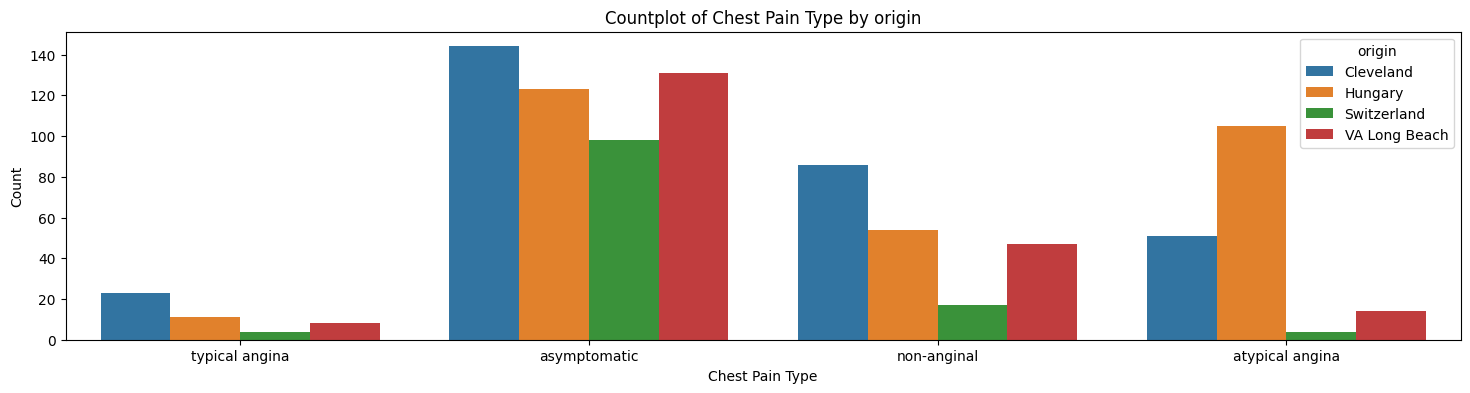

In [18]:
# Plot the countplot cp column based on datset
plt.figure(figsize=(18,4))
countplot_chest_pain = sns.countplot(df, x='cp' , hue='origin')
# Add title and labels to the plot
countplot_chest_pain.set_title('Countplot of Chest Pain Type by origin')
countplot_chest_pain.set_xlabel('Chest Pain Type')
countplot_chest_pain.set_ylabel('Count')
countplot_chest_pain

In [19]:
# Groupby this with origin column
typical_angina_count_by_origin = df.groupby('origin')['cp'].value_counts()

# Print the Result using f string

print(typical_angina_count_by_origin)
print('----------------------------------------------------')

origin         cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64
----------------------------------------------------


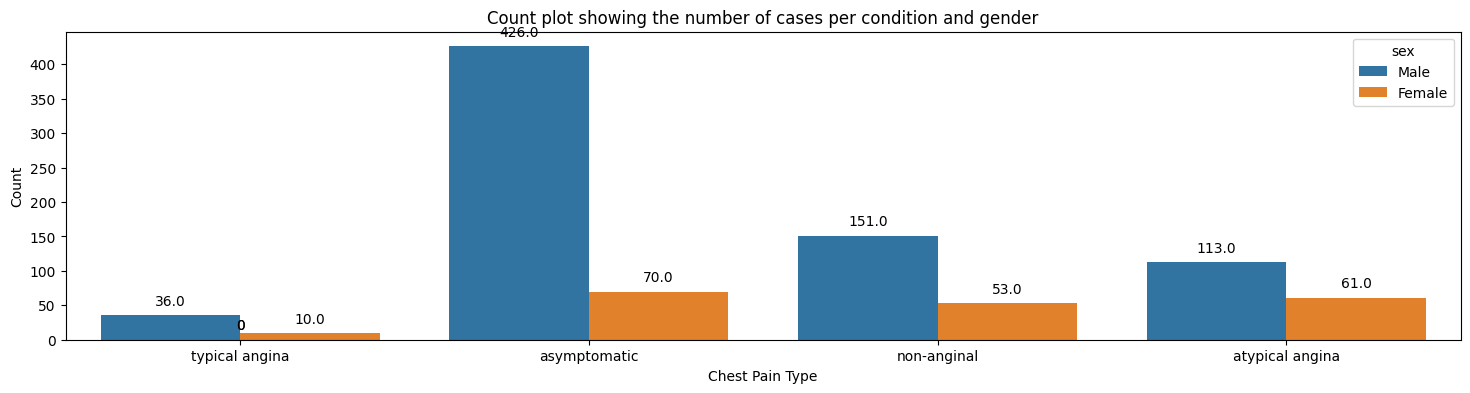

In [20]:
# find chect pain type by sex
plt.figure(figsize=(18, 4))

# Using Seaborn's countplot to display counts on top of bars
countplot_sex = sns.countplot(data=df, x='cp', hue='sex')
plt.title('Count plot showing the number of cases per condition and gender')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')


# Adding count values on top of the bars using text annotations
for p in countplot_sex.patches:
    countplot_sex.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Its mean 36 male  and 10 female had  typical angina type chest pain 

####  Explore the trestbps (resting blood pressure ) Column:

In [21]:
# Find the summery of trestbps column
trestbps_Summery = df['trestbps'].describe()
trestbps_Summery

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

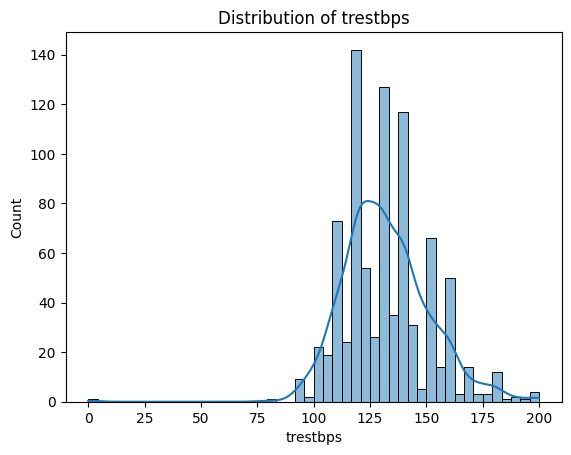

In [22]:
# plot histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)
plt.title('Distribution of trestbps')
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.show()

In [23]:
# Find the missing Values in trestbps columns and Than Deal 
# Perectnage of Trestbps column of missing values 

trestbps_Missingvalue_Perectange = df['trestbps'].isnull().sum() / df.shape[0] * 100


print(f'Percentage of Missing Values in trestbps column : {trestbps_Missingvalue_Perectange:.2f} %')
print("-----------------------------------------------------------")

Percentage of Missing Values in trestbps column : 6.41 %
-----------------------------------------------------------


# Impute the Missing values of trestbps column using iterative imputer 

In [24]:
# Impute the Missing values of trestbps column using iterative imputer 

imputer_1 = IterativeImputer(max_iter=10, random_state=42)
imputer1 = imputer_1.fit(df[['trestbps']])
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing Values in trestbps column: {df['trestbps'].isnull().sum()}")


Missing Values in trestbps column: 0


#  Finding missing Values in other Column 


In [25]:

(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
origin       0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [26]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
# Print The missing data using f string
print(f'The missing data is : \n{missing_data}')
print('-------------------------------------------------------------------------------')

# Store the Missing columns in object 
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

The missing data is : 
ca         611
thal       486
slope      309
fbs         90
oldpeak     62
thalch      55
exang       55
chol        30
restecg      2
dtype: int64
-------------------------------------------------------------------------------


['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [27]:
# Store The Columns based on data-type in seprate object
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

### Make a Automate Function for Categorical and Object Datatype column to impute Missing Values 

In [28]:
# define the function to impute the missing values in thal column
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


   

##  Make a Automate Function for Numeric  Datatype column to impute Missing Values .

In [29]:
def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


When the  following block of code run it pass the num_cols to impute_continuous_missing_data and cat_cols to the  impute_categorical_missing_data

In [30]:
# Use the function to impute missing values
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values chol : 3.26%


MAE = 44.800674157303376 

RMSE = 63.61967226319549 

R2 = 0.6793719597578204 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.76 accuracy

Missing Values thalch : 5.98%
MAE = 16.800404624277455 

RMSE = 21.621211098459817 

R2 = 0.32024979440041124 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5680290697674418 

RMSE = 0.7876422758150827 

R2 = 0.4089612129327366 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 61.29 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



## Deal with Outliers

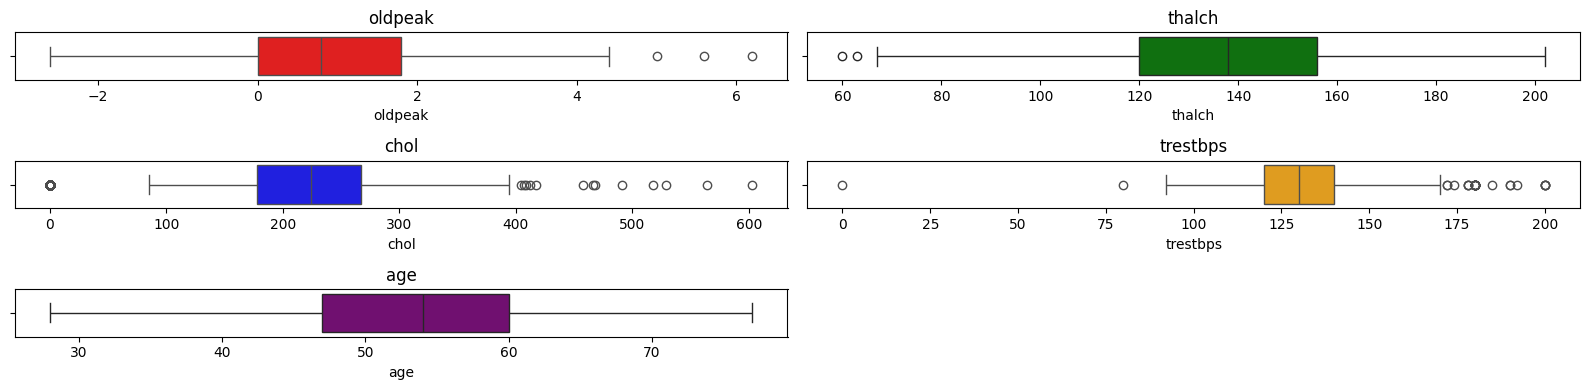

In [31]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(16, 4))

# Assuming num_cols is a list of numeric column names in your DataFrame
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])  # Use colors[i] instead of colors
    plt.title(col)

plt.tight_layout()
plt.show()

In [32]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

fig = px.box(df, y=numerical_cols, color_discrete_sequence=colors, labels={'variable': 'Column'})
fig.update_layout(height=400, width=1000, title_text="Boxplots for Numeric Columns")
fig.show()

## Model Development and Evaluation
#### Enlist All the models that i will use to predict the heart disease. These models should be classifier for multi-class Classification.

* **Logestic regression**
* **KNN**
* **NB**
* **Decision Tree**
* **Random Forest**
* **XGboost**
* **Adabosst**
* **GradientBoostingClassifier**
* **LightGBM**

   ##                                                          Split the Data into X and y

In [33]:
# Split the Data into X and y
X = df.drop('num', axis=1)
y = df['num']

# Encode the data using seperate label encoder for all categorical columns and save it for inverse transform
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass    
# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Import all models

In [34]:
# Import all models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Import metrics 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report




In [37]:

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.6779187350615923
Test Accuracy: 0.6358695652173914

Model: Gradient Boosting
Cross-validation Accuracy: 0.6602868174296745
Test Accuracy: 0.6413043478260869

Model: Support Vector Machine
Cross-validation Accuracy: 0.5937212722927008
Test Accuracy: 0.5597826086956522

Model: Logistic Regression
Cross-validation Accuracy: 0.5203530060672918
Test Accuracy: 0.5

Model: Decision Tree
Cross-validation Accuracy: 0.6276797205368634
Test Accuracy: 0.6195652173913043

Model: XGBoost
Cross-validation Accuracy: 0.6643224857510572
Test Accuracy: 0.6467391304347826

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.596442360728075
Test Accuracy: 0.5380434782608695

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number

#### **Output:**
1. Most of People get Heart Disease  at the Age of Range **`53-54`** years.
2. Most Of the Males and females get are with heart disease at the age of **`54-55`** years.
3. Percentage of Male in the data: **`78.91 %`** 
4. Percentage of Female in the data: **`21.09 %`**
5. Males are `274.23%` more than Females in the data. **`274.23%`** it Means that **`2.74x`** Increase Males rather than Females.
6. The highest number of People From **`Cleveland 304`** and Lowest From **`Switzerland 123`**.
7. The highest number of Females From **`Cleveland 97`** and Lowest From **`Switzerland 6`**
8. The highest number of Males From **`Hungary 212`** and Lowest From **`Switzerland 113`**


- Most of individuals with heart disease in Cleveland: **`54.35 years`**
- Most of individuals with heart disease in Hungary: **`47.89 years`**
- Most of individuals with heart disease in Switzerland: **`55.32 years`**
- Most of individuals with heart disease in VA Long Beach: **`59.35 years.`**

- Number of cases classified as "asymptomatic":**` 496`**
- Number of cases classified as "non-anginal": **`204`**
- Number of cases classified as "atypical angina": **`174`**
- Number of cases classified as "typical angina": **`46`**


##  The Best Model is Random Forest Classifier with Cross-validation Accuracy: 0.6779187350615923

## Future Work
 I will further refine and optimize it using advanced techniques such as

- Feature Selection/Engineering
- Hyperparameter Tuning
- Ensemble Multiple Models
- Exploration of Additional Attributes
